In [1]:
pathtorepo = "C:\\Users\\HOME\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\HOME\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\HOME\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\HOME\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
[ Info: Precompiling DynamicalSystems [61744808-ddfa-5f27-97ff-6e42cc95d634]
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a]


In [21]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [22]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [14]:
I0 = -1.635; U0 = 0.28;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = SA[8.3350, 0.7384, 0.4382];

In [15]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.28, 0.305, 0.3, -1.635]
 time:          0.0
 state:         [8.335, 0.7384, 0.4382]


In [16]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [17]:
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.489835218058154
 0.736582767586405
 0.42898042200079145

In [80]:
prob_for = ODEProblem(TM, sol_for[end], (0.0, 500), p) # SA[11.0, 0.4, 0.6]
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

In [81]:
println("Length: $(length(sol_for))")

Length: 500002


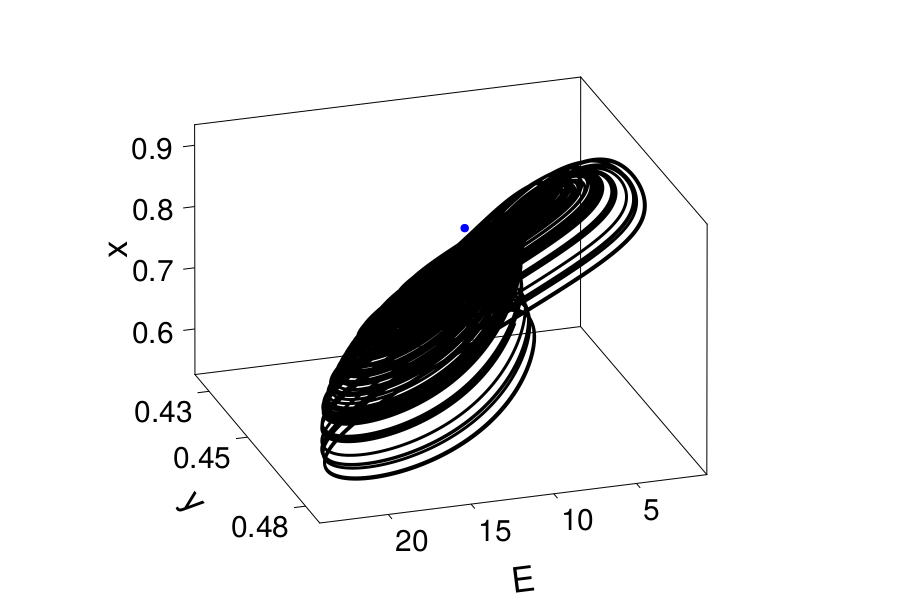

CairoMakie.Screen{IMAGE}


In [100]:
ts, tf = 400000, 450000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.43, 0.45, 0.48])

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(f)

In [94]:
save("phase_chaotic_non_hom.eps", f)

CairoMakie.Screen{EPS}


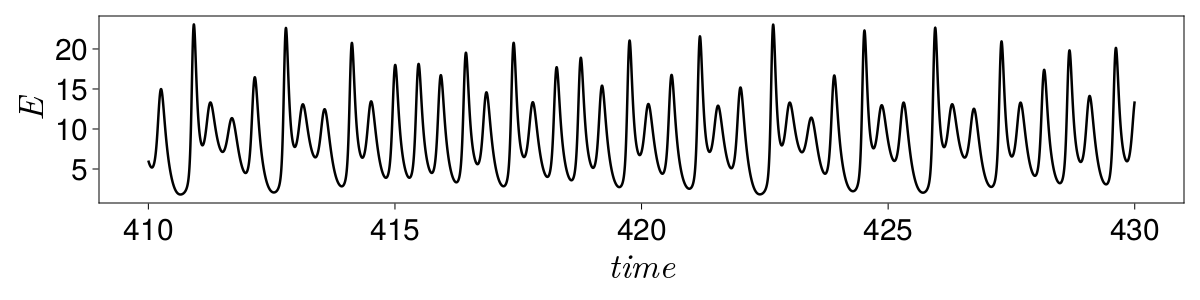

In [95]:
# Vern9
ts, tf = 410000, 430000
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
f

In [96]:
save("timeseries_chaotic_non_hom.eps", f)

CairoMakie.Screen{EPS}
